In [1]:
#%cd C:\Users\bahaa\Planck-Mass-MC-Master\planck-mass-MC-master\Documentation\Examples\Animated Plotting Example

from planckmc.track_generation import halo_model
from planckmc.track_generation import make_tracks
from planckmc.detector_characteristics import DETECTOR_CHARACTERISTICS
from planckmc.response import sensor_response, RESPONSE_DICT
from planckmc.config import CONFIG
import numpy as np
from numba import njit, jit
#%matplotlib widget
import matplotlib # plotting libraries
from matplotlib import animation, rc, cm
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LightSource
from tqdm import tqdm
#from matplotlib import interactive
#interactive(True)
import matplotlib.image as NonUniformImage


C:\Users\bahaa\anaconda3\lib\site-packages\wimprates\halo.py:144: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


In [2]:
## Custom Track
#entry_vecs = np.array([[-5.740849468533311, -0.50509367762517, 8.827299589916864]]).T
entry_vecs = np.array([[-8, -0.36973624232364, 11.77911628743514]]).T
#exit_vecs = np.array([[13.236384825224299, -1.6421182925593525, -15.968443890116967]]).T
exit_vecs = np.array([[10, -1.4482096780206, -11.73976827349496]]).T
t_entry = np.array([0.0])
t_exit = np.array([4.27096079e-5])

In [20]:
vel = halo_model.generate_vel_array(n_vels=10)

In [22]:
#vel (m/s)

In [3]:
entry_vecs, exit_vecs, t_entry, t_exit = make_tracks.generate_tracks(vel, np.zeros(vel.shape))

In [5]:
out = make_tracks.generate_acceleration_dict(entry_vecs, exit_vecs, t_entry, t_exit, {'M':2.18e9, 'G':6.674e-11},)

In [6]:
CONFIG['Track Generation']['BoundingSphereRadius']

'7'

In [7]:
out[0]['time']

array([ -500,  -400,  -300,  -200,  -100,     0,   100,   200,   300,
         400,   500,   600,   700,   800,   900,  1000,  1100,  1200,
        1300,  1400,  1500,  1600,  1700,  1800,  1900,  2000,  2100,
        2200,  2300,  2400,  2500,  2600,  2700,  2800,  2900,  3000,
        3100,  3200,  3300,  3400,  3500,  3600,  3700,  3800,  3900,
        4000,  4100,  4200,  4300,  4400,  4500,  4600,  4700,  4800,
        4900,  5000,  5100,  5200,  5300,  5400,  5500,  5600,  5700,
        5800,  5900,  6000,  6100,  6200,  6300,  6400,  6500,  6600,
        6700,  6800,  6900,  7000,  7100,  7200,  7300,  7400,  7500,
        7600,  7700,  7800,  7900,  8000,  8100,  8200,  8300,  8400,
        8500,  8600,  8700,  8800,  8900,  9000,  9100,  9200,  9300,
        9400,  9500,  9600,  9700,  9800,  9900, 10000, 10100, 10200,
       10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100,
       11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000,
       12100, 12200,

In [6]:
out[0]['particle_location'][0]

array([-8.21072542, -0.35711059, 12.05445111])

In [8]:
sensors = tuple(DETECTOR_CHARACTERISTICS.keys())
out[0][sensors[0]]

array([[-3.10111820e-06,  1.12475769e-04,  2.95129195e-04],
       [-2.49926673e-06,  1.13271268e-04,  2.96498375e-04],
       [-1.88834028e-06,  1.14072928e-04,  2.97873079e-04],
       ...,
       [ 3.45278651e-04,  1.24351660e-04, -7.51733768e-05],
       [ 3.43504933e-04,  1.23378844e-04, -7.56530350e-05],
       [ 3.41738553e-04,  1.22413641e-04, -7.61214079e-05]])

In [9]:
d=[]
for x in range(0,len(out[0][sensors[0]])):
    d.append(np.linalg.norm(out[0][sensors[50]][x]))
max(d)

0.003052246596397475

In [10]:
positions2 = []

for sensor in DETECTOR_CHARACTERISTICS:
    positions2.append(DETECTOR_CHARACTERISTICS[sensor]['position'])

dist_actl = np.ones((len(out), len(positions2)))
accl_actl = np.ones((len(out), len(sensors)))
lim_actl_loc = np.ones((len(out), len(sensors)))
lim_actl = np.ones((len(out), len(sensors)))
out_len = len(out)
sen_len = len(sensors)

for lim1_loc in range(0, out_len):
    for lim2_loc in range(0, sen_len):
        for lim3_loc in range(0, len(out[lim1_loc]['particle_location'])):
            dist_sens_part = np.linalg.norm(positions2[lim2_loc] - out[lim1_loc]['particle_location'][lim3_loc])
            if lim3_loc == 0:
                dist_actl[lim1_loc][lim2_loc] = dist_sens_part
                lim_actl_loc[lim1_loc][lim2_loc] = lim3_loc
            elif dist_sens_part < dist_actl[lim1_loc][lim2_loc]:
                dist_actl[lim1_loc][lim2_loc] = dist_sens_part
                lim_actl_loc[lim1_loc][lim2_loc] = lim3_loc
                lim_actl[lim1_loc==6]

for lim1_acc in range(0, out_len):
    for lim2_acc in tqdm(range(0, sen_len)):
        for lim3_acc in range(0, len(out[lim1_acc][sensors[lim2_acc]])):
            accl = np.linalg.norm(out[lim1_acc][sensors[lim2_acc]][lim3_acc])
            if lim3_acc == 0:
                accl_actl[lim1_acc][lim2_acc] = accl
                lim_actl[lim1_acc][lim2_acc] = lim3_acc
            elif accl > accl_actl[lim1_acc][lim2_acc]:
                accl_actl[lim1_acc][lim2_acc] = accl
                lim_actl[lim1_acc][lim2_acc] = lim3_acc


100%|██████████| 512/512 [00:02<00:00, 187.42it/s]


In [11]:
k = 0
lim_cl_all = lim_actl[k]
start_x = out[k]['particle_location'][int(min(lim_cl_all))-1,0]
start_y = out[k]['particle_location'][int(min(lim_cl_all))-1,1]
start_z = out[k]['particle_location'][int(min(lim_cl_all))-1,2]
end_x = out[k]['particle_location'][int(max(lim_cl_all))-1,0] # - out[k]['particle_location'][int(min(lim_cl_all))-1,0]
end_y = out[k]['particle_location'][int(max(lim_cl_all))-1,1] #- out[k]['particle_location'][int(min(lim_cl_all))-1,1]
end_z = out[k]['particle_location'][int(max(lim_cl_all))-1,2] #- out[k]['particle_location'][int(min(lim_cl_all))-1,2]

In [12]:
print(start_x)
print(start_y)
print(start_z)

-5.3870048102221055
-0.5262943478669398
8.364964497065587


In [13]:
print(end_x)
print(end_y)
print(end_z)

6.835069464545471
-1.258582260892052
-7.604455167566199


100%|██████████| 512/512 [05:21<00:00,  1.59it/s] 


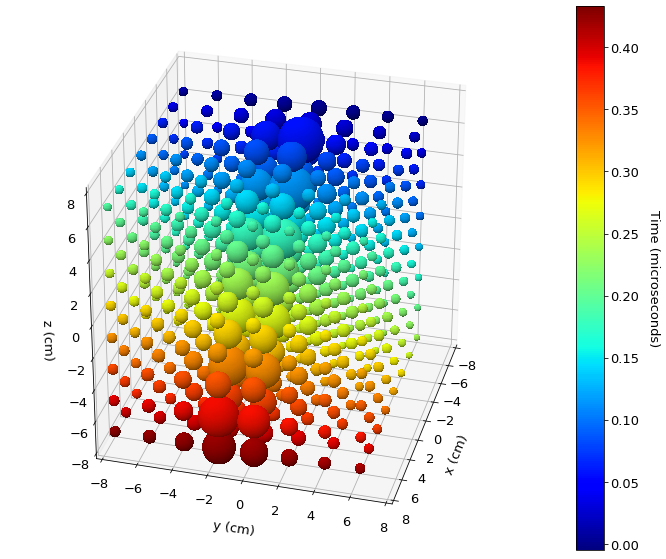

In [33]:
partl_num = 1
fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(111, projection='3d')

ax1.clear()
positions2 = np.array(positions2)
ax1.elev = 30
ax1.azim = 15
ax1.set(xlim=[-8,8],ylim=[-8,8],zlim=[-8,8])
ax1.set_xlabel('x (cm)', fontsize=13, labelpad=10)
ax1.set_ylabel('y (cm)', fontsize=13, labelpad=10)
ax1.set_zlabel('z (cm)', fontsize=13, labelpad=10)
ax1.tick_params(labelsize=13)

cbar = fig1.colorbar(cm.ScalarMappable(norm=clr.Normalize(min(out[partl_num-1]['time'])/100000,max(out[partl_num-1]['time'])/100000), cmap='jet'), ax=ax1)
cbar.ax.set_ylabel('Time (microseconds)', rotation=270, fontsize=13)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.tick_params(labelsize=13)

mags = []
sz_sen = []
for sens in range(0, sen_len):
    for len_outAccls in range(0, len(out[partl_num-1][sensors[sens]])):
        mags.append(np.linalg.norm(out[partl_num-1][sensors[sens]][len_outAccls]))
mags_mx = max(mags)
mags_mn = min(mags)
lim_cl_all = lim_actl[partl_num-1]

for sens in tqdm(range(0, sen_len)):
    lim_cl = int(lim_cl_all[sens])
    sz_sen.append((accl_actl[partl_num-1][sens]-mags_mn) / (mags_mx-mags_mn))
        
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = (sz_sen[sens] * 2)**(1/3) * np.outer(np.cos(u), np.sin(v)) + positions2.T[0][sens]
    y = (sz_sen[sens] * 2)**(1/3) * np.outer(np.sin(u), np.sin(v)) + positions2.T[1][sens]
    z = (sz_sen[sens] * 2)**(1/3) * np.outer(np.ones(np.size(u)), np.cos(v)) + positions2.T[2][sens]
    
    norm = clr.Normalize(vmin=out[partl_num-1]['time'][int(min(lim_cl_all))] - 500, vmax=out[partl_num-1]['time'][int(max(lim_cl_all))] + 500)
    val = norm(int(out[partl_num-1]['time'][lim_cl]))
    mp = plt.get_cmap('jet')
    colr = mp(val)
    
    ax1.plot_surface(x, y, z, color=colr, alpha=1, rcount = 100, ccount = 100, shade=True, antialiased=False, lightsource=LightSource(altdeg=110))
    
#x2 = (0.5 * np.outer(np.cos(u), np.sin(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,0]
#y2 = (0.5 * np.outer(np.sin(u), np.sin(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,1]
#z2 = (0.5 * np.outer(np.ones(np.size(u)), np.cos(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,2]
#particle = ax1.plot_surface(x2, y2, z2, color='black', alpha=1, rcount = 100, ccount = 100, shade=True, antialiased=False, lightsource=LightSource(altdeg=110))

start_x = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,0]
start_y = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,1]
start_z = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,2]
#end_x = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,0] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,0]
#end_y = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,1] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,1]
#end_z = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,2] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,2]

#start_x = out[partl_num-1]['particle_location'][0,0]
#start_y = out[partl_num-1]['particle_location'][0,1]
#start_z = out[partl_num-1]['particle_location'][0,2]

#ax1.quiver(start_x, start_y, start_z, 10.24882124-start_x,  -1.46311785-start_y, -12.06487928-start_z, color='black', normalize=False, arrow_length_ratio=0.1)

#plt.axis('off')

100%|██████████| 512/512 [06:10<00:00,  1.38it/s]


(-8.0, 8.0, -8.0, 8.0)

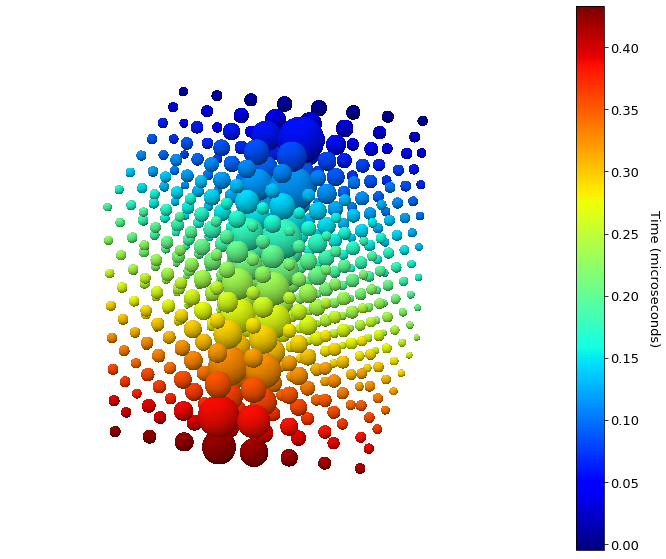

In [12]:
partl_num = 1
fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(111, projection='3d')

ax1.clear()
positions2 = np.array(positions2)
ax1.elev = 30
ax1.azim = 15
ax1.set(xlim=[-8,8],ylim=[-8,8],zlim=[-8,8])
ax1.set_xlabel('x (cm)', fontsize=13, labelpad=10)
ax1.set_ylabel('y (cm)', fontsize=13, labelpad=10)
ax1.set_zlabel('z (cm)', fontsize=13, labelpad=10)
ax1.tick_params(labelsize=13)

cbar = fig1.colorbar(cm.ScalarMappable(norm=clr.Normalize(min(out[partl_num-1]['time'])/100000,max(out[partl_num-1]['time'])/100000), cmap='jet'), ax=ax1)
cbar.ax.set_ylabel('Time (microseconds)', rotation=270, fontsize=13)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.tick_params(labelsize=13)

mags = []
sz_sen = []
for sens in range(0, sen_len):
    for len_outAccls in range(0, len(out[partl_num-1][sensors[sens]])):
        mags.append(np.linalg.norm(out[partl_num-1][sensors[sens]][len_outAccls]))
mags_mx = max(mags)
mags_mn = min(mags)
lim_cl_all = lim_actl[partl_num-1]

for sens in tqdm(range(0, sen_len)):
    lim_cl = int(lim_cl_all[sens])
    sz_sen.append((accl_actl[partl_num-1][sens]-mags_mn) / (mags_mx-mags_mn))
        
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = (sz_sen[sens] * 2)**(1/3) * np.outer(np.cos(u), np.sin(v)) + positions2.T[0][sens]
    y = (sz_sen[sens] * 2)**(1/3) * np.outer(np.sin(u), np.sin(v)) + positions2.T[1][sens]
    z = (sz_sen[sens] * 2)**(1/3) * np.outer(np.ones(np.size(u)), np.cos(v)) + positions2.T[2][sens]
    
    norm = clr.Normalize(vmin=out[partl_num-1]['time'][int(min(lim_cl_all))] - 500, vmax=out[partl_num-1]['time'][int(max(lim_cl_all))] + 500)
    val = norm(int(out[partl_num-1]['time'][lim_cl]))
    mp = plt.get_cmap('jet')
    colr = mp(val)
    
    ax1.plot_surface(x, y, z, color=colr, alpha=1, rcount = 100, ccount = 100, shade=True, antialiased=False, lightsource=LightSource(altdeg=110))
    
#x2 = (0.5 * np.outer(np.cos(u), np.sin(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,0]
#y2 = (0.5 * np.outer(np.sin(u), np.sin(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,1]
#z2 = (0.5 * np.outer(np.ones(np.size(u)), np.cos(v))) + out[partl_num-1]['particle_location'][len(out[0]['particle_location'])-1,2]
#particle = ax1.plot_surface(x2, y2, z2, color='black', alpha=1, rcount = 100, ccount = 100, shade=True, antialiased=False, lightsource=LightSource(altdeg=110))

start_x = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,0]
start_y = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,1]
start_z = out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,2]
#end_x = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,0] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,0]
#end_y = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,1] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,1]
#end_z = out[partl_num-1]['particle_location'][int(max(lim_cl_all))-1,2] - out[partl_num-1]['particle_location'][int(min(lim_cl_all))-1,2]

#start_x = out[partl_num-1]['particle_location'][0,0]
#start_y = out[partl_num-1]['particle_location'][0,1]
#start_z = out[partl_num-1]['particle_location'][0,2]

#ax1.quiver(start_x, start_y, start_z, 10.24882124-start_x,  -1.46311785-start_y, -12.06487928-start_z, color='black', normalize=False, arrow_length_ratio=0.1)

plt.axis('off')

In [34]:
fig1.savefig('Sensors_Final.png')

In [36]:
fig1.savefig('Sensors_High_Res.png', dpi=300)

In [40]:
-5.740849468533311
-0.50509367762517
8.827299589916864

8.827299589916864

In [41]:
13.236384825224299
-1.6421182925593525
-15.968443890116967

-15.968443890116967

In [43]:
array([-50000, -49000, -48000, -47000, -46000, -45000, -44000, -43000,
       -42000, -41000, -40000, -39000, -38000, -37000, -36000, -35000,
       -34000, -33000, -32000, -31000, -30000, -29000, -28000, -27000,
       -26000, -25000, -24000, -23000, -22000, -21000, -20000, -19000,
       -18000, -17000, -16000, -15000, -14000, -13000, -12000, -11000,
       -10000,  -9000,  -8000,  -7000,  -6000,  -5000,  -4000,  -3000,
        -2000,  -1000,      0,   1000,   2000,   3000,   4000,   5000,
         6000,   7000,   8000,   9000,  10000,  11000,  12000,  13000,
        14000,  15000,  16000,  17000,  18000,  19000,  20000,  21000,
        22000,  23000,  24000,  25000,  26000,  27000,  28000,  29000,
        30000,  31000,  32000,  33000,  34000,  35000,  36000,  37000,
        38000,  39000,  40000,  41000,  42000,  43000,  44000,  45000,
        46000,  47000,  48000,  49000,  50000,  51000,  52000,  53000,
        54000,  55000,  56000,  57000,  58000,  59000,  60000,  61000,
        62000,  63000,  64000,  65000,  66000,  67000])

NameError: name 'array' is not defined

In [46]:
-6.5, -0.459609, 9.81921

14, -1.6878704415088, -16.96618706481275

(14, -1.6878704415088, -16.96618706481275)

In [ ]:
(13.236384825224299+5.740849468533311)/a = (-1.6421182925593525+0.50509367762517)/b = (-15.968443890116967-8.827299589916864)/c